# UJM - Master DSC/MLDM - Deep Learning - TP1a

## Help and documentation on Keras

From the page of Keras: <https://keras.io>
In particular you will have access to some guides: <https://keras.io/guides/>
And the API where you can look for specific functions or functionalities <https://keras.io/api/>



### Part 1

As a cold start, we begin by considering some generated data

First we take the packages for displaying elements and generating data, we will use sklearn

In [124]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [125]:
centers = [(0, -5), (0, 5), (5, 0)]
X, y = make_blobs(n_samples=1000, n_features=2, cluster_std=1.5, centers=centers)

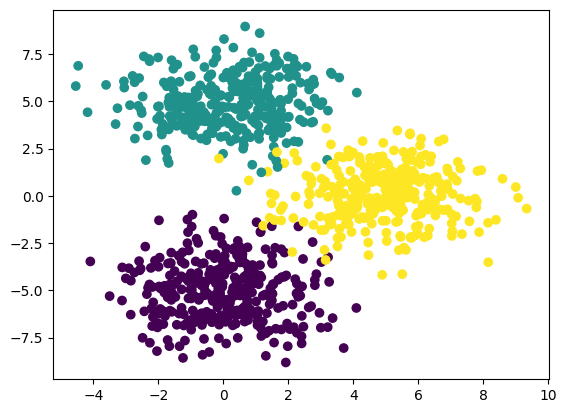

In [126]:
plt.scatter(X[:,0],X[:,1], c=y)
plt.show()

In [127]:
X[:10]

array([[ 0.65570307,  5.42051185],
       [-0.58170969, -5.25833471],
       [-2.28784694,  7.23684131],
       [-2.26923551,  7.12099087],
       [ 1.34686673,  6.21456694],
       [ 7.86712488, -1.91956204],
       [-0.36129556, -4.4084504 ],
       [ 6.29607079, -0.72540019],
       [ 1.04950449, -6.83445591],
       [ 4.56629808, -1.47324906]])

In [128]:
y[:10]

array([1, 0, 1, 1, 1, 2, 0, 2, 0, 2])

**Keras modules**

We now import keras modules for defining a MLP:
Sequential: type of Network, Dense: type of layers, Dropout allowing regularization, to_categorial for dealing with labels

In [129]:
from tensorflow import keras
from tensorflow.keras import models, layers, utils

**Note** We need to convert the labels to categorical data (one-hot-vector) to be used for cross entropy loss with Keras, we have 3 classes here

In [130]:
Y = utils.to_categorical(y, 3)

**Note** We prepare the data with a split into train/test with ration 2:1 ussing Sklearn train_test_split, random seed is initialized to 1

In [131]:
X_train, X_test, y_train, y_test=train_test_split(X,Y,test_size=0.33,random_state=1)

**Note** We create a model with 3 layers, activations are ReLu and we add dropout regularizations. Last activation is softmax

In [132]:
def create_model():
    model = keras.Sequential()
    model.add(layers.Input(shape=(2,)))
    model.add(layers.Dense(6, activation='relu'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(6, activation='relu'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(3, activation='softmax'))
    return model

**Note** we now define the loss (crossentropy), the optimizer (adam) and the performance metrics, and we print the model

In [133]:
model = create_model()
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
print(model.summary())

Model: "sequential_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_102 (Dense)               │ (None, 6)              │            18 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_50 (Dropout)            │ (None, 6)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_103 (Dense)               │ (None, 6)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_51 (Dropout)            │ (None, 6)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_104 (Dense)               │ (None, 3)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81 (324.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 0 (0.00 B)

None


**Note** we now launch training by fixing the number of epochs and the batch size

In [134]:
model.fit(X_train, y_train, epochs=50, batch_size=64)

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5851 - loss: 0.8611  
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5836 - loss: 0.8211
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6209 - loss: 0.7567
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6254 - loss: 0.7047
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6358 - loss: 0.6782
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6940 - loss: 0.6217
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7254 - loss: 0.5990
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7433 - loss: 0.5895
Epoch 9/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7552 - loss: 0.5471
Epoch 10/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7866 - loss: 0.4862
Epoch 11/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 907us/step - accuracy: 0.8090 - loss: 0.4389
Epoch 12/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 916us/step - accuracy: 0.777

**Note** we now display accuracy on train and test

In [135]:
_, train_acc = model.evaluate(X_train, y_train, batch_size=64)
_, test_acc = model.evaluate(X_test, y_test, batch_size=64)
print('training_accuracy:', train_acc)
print('testing_accuracy:', test_acc)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9925 - loss: 0.0536 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9848 - loss: 0.0711
training_accuracy: 0.9925373196601868
testing_accuracy: 0.9848484992980957


**Note** if you fit again the model may continue to train

If you want to display the result every 10 epochs, you could use the following kind of loops
```
for i in range(5):
    model.fit(X_train, y_train, epochs=10, batch_size=64,verbose=0)
    _, train_acc = model.evaluate(X_train, y_train, batch_size=64)
    _, test_acc = model.evaluate(X_test, y_test, batch_size=64)
    print('training_accuracy, epoch number ', i*10+ 10,' : ', train_acc)
    print('testing_accuracy, epoch number ', i*10+ 10,' : ', test_acc,'\n')
```

**Question**
Use this procedure to compare the behavior of different optimizers available on Keras, check this page
<https://keras.io/api/optimizers/>
Try to compare the behavior of: SGD, RMSprop, Adam, Adadelta, Adagrad
Have a look to the available parameters

In [136]:
model = create_model()
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, batch_size=64)

_, train_acc = model.evaluate(X_train, y_train, batch_size=64)
_, test_acc = model.evaluate(X_test, y_test, batch_size=64)
print('training_accuracy:', train_acc)
print('testing_accuracy:', test_acc)

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2075 - loss: 1.9535  
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4254 - loss: 1.0776
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4791 - loss: 0.9327
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5269 - loss: 0.8488
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6642 - loss: 0.7569
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7045 - loss: 0.7309
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step - accuracy: 0.7522 - loss: 0.6680
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step - accuracy: 0.7746 - loss: 0.6317
Epoch 9/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - accuracy: 0.7985 - loss: 0.6111
Epoch 10/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 896us/step - accuracy: 0.8119 - loss: 0.5899
Epoch 11/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 890us/step - accuracy: 0.8254 - loss: 0.5864
Epoch 12/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 894us/step - accurac

In [137]:
model = create_model()
opt = keras.optimizers.Adadelta(learning_rate=1.0)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, batch_size=64)

_, train_acc = model.evaluate(X_train, y_train, batch_size=64)
_, test_acc = model.evaluate(X_test, y_test, batch_size=64)
print('training_accuracy:', train_acc)
print('testing_accuracy:', test_acc)

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1149 - loss: 1.9534  
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1776 - loss: 1.6993
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2582 - loss: 1.4610
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3657 - loss: 1.3035
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4478 - loss: 1.2139
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4910 - loss: 1.0962
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5343 - loss: 0.9794
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5567 - loss: 0.8946
Epoch 9/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6000 - loss: 0.8649
Epoch 10/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6209 - loss: 0.8061
Epoch 11/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6045 - loss: 0.8086
Epoch 12/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6507 - 

**Question** Using your favorite optimizer, try to change the architecture by simplifying or complexifying it, how the performance evolves?
Objective: Learn to add normalization layers, dropout, L1/L2 regularization.

In [138]:
model = keras.Sequential()
model.add(layers.Input(shape=(2,)))
model.add(layers.Dense(6, activation='relu'))
model.add(layers.Dense(6, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, batch_size=64)

_, train_acc = model.evaluate(X_train, y_train, batch_size=64)
_, test_acc = model.evaluate(X_test, y_test, batch_size=64)
print('\nbaseline (no normalization, dropout, regularization):')
print('training_accuracy:', train_acc)
print('testing_accuracy:', test_acc)

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4000 - loss: 1.3831  
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5418 - loss: 1.1997
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step - accuracy: 0.5881 - loss: 1.0689
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6269 - loss: 0.9649
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - accuracy: 0.6507 - loss: 0.8777
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 970us/step - accuracy: 0.6537 - loss: 0.8008
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6582 - loss: 0.7312
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 961us/step - accuracy: 0.6597 - loss: 0.6707
Epoch 9/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 940us/step - accuracy: 0.6612 - loss: 0.6148
Epoch 10/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step - accuracy: 0.6642 - loss: 0.5651
Epoch 11/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 978us/step - accuracy: 0.7493 - loss: 0.5198
Epoch 12/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accur

In [141]:
from tensorflow.keras import activations

model = keras.Sequential()
model.add(layers.Input(shape=(2,)))
model.add(layers.Dense(6, activation=None))
model.add(layers.LayerNormalization())
model.add(layers.Activation(activations.relu))
model.add(layers.Dense(6, activation=None))
model.add(layers.LayerNormalization())
model.add(layers.Activation(activations.relu))
model.add(layers.Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, batch_size=64)

_, train_acc = model.evaluate(X_train, y_train, batch_size=64)
_, test_acc = model.evaluate(X_test, y_test, batch_size=64)
print('\nAdd layer normalization:')
print('training_accuracy:', train_acc)
print('testing_accuracy:', test_acc)

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4940 - loss: 0.9052  
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5761 - loss: 0.8483
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6612 - loss: 0.7996
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6642 - loss: 0.7584
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6657 - loss: 0.7230
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6657 - loss: 0.6912
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6851 - loss: 0.6620
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7000 - loss: 0.6347
Epoch 9/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step - accuracy: 0.7224 - loss: 0.6088
Epoch 10/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step - accuracy: 0.7507 - loss: 0.5838
Epoch 11/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7701 - loss: 0.5595
Epoch 12/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.792

In [142]:
from tensorflow.keras import activations

model = keras.Sequential()
model.add(layers.Input(shape=(2,)))
model.add(layers.Dense(6, activation=None))
model.add(layers.LayerNormalization())
model.add(layers.Activation(activations.relu))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(6, activation=None))
model.add(layers.LayerNormalization())
model.add(layers.Activation(activations.relu))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, batch_size=64)

_, train_acc = model.evaluate(X_train, y_train, batch_size=64)
_, test_acc = model.evaluate(X_test, y_test, batch_size=64)
print('\nAdd layer normalization + dropout:')
print('training_accuracy:', train_acc)
print('testing_accuracy:', test_acc)

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3328 - loss: 1.5681  
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3597 - loss: 1.4439
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3776 - loss: 1.3458
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4269 - loss: 1.2633
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4403 - loss: 1.1744
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5313 - loss: 1.0595
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5567 - loss: 0.9930
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5731 - loss: 0.9446
Epoch 9/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6104 - loss: 0.8693
Epoch 10/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step - accuracy: 0.5851 - loss: 0.8356
Epoch 11/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6045 - loss: 0.7722
Epoch 12/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6209 

In [144]:
from tensorflow.keras import regularizers

model = keras.Sequential()
model.add(layers.Input(shape=(2,)))
model.add(layers.Dense(
    6, 
    activation=None, 
    kernel_regularizer=regularizers.L1(1e-5),
    bias_regularizer=regularizers.L2(1e-4),
    activity_regularizer=regularizers.L2(1e-5)
    ))
model.add(layers.LayerNormalization())
model.add(layers.Activation(activations.relu))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(
    6, 
    activation=None,
    kernel_regularizer=regularizers.L1(1e-5),
    bias_regularizer=regularizers.L2(1e-4),
    activity_regularizer=regularizers.L2(1e-5)
    ))
model.add(layers.LayerNormalization())
model.add(layers.Activation(activations.relu))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, batch_size=64)

_, train_acc = model.evaluate(X_train, y_train, batch_size=64)
_, test_acc = model.evaluate(X_test, y_test, batch_size=64)
print('\nAdd layer normalization + dropout + l1 norm:')
print('training_accuracy:', train_acc)
print('testing_accuracy:', test_acc)

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4478 - loss: 1.0746
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4851 - loss: 1.0179
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5284 - loss: 0.9684
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5597 - loss: 0.9035
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5791 - loss: 0.8762
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6493 - loss: 0.7946
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7119 - loss: 0.7122
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7254 - loss: 0.7278
Epoch 9/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7507 - loss: 0.6918
Epoch 10/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7672 - loss: 0.6947
Epoch 11/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7731 - loss: 0.6555
Epoch 12/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7463 - lo

**Final Question** Write down the similarities and differences between torch and keras version of the notebooks below.

### Similarities
- We follow the same overall structure, model architecture, training config
### Differences
- Data preprocessing: keras - manual normalization, pytorch - normalization handled by ToTensor()
- Model definition: diffrent syntax, no explicit softmax when defining model for pytorch since CrossEntropyLoss includes it
- Training: keras - high-level API: compile then fit, pytorch - manual implemenation
- Evaluation: keras - high-level API: evaluate to get score, pytorch - manual implemenation